In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# train

In [2]:
df_train_og = pd.read_csv('open_ag/train/train.csv')
df_train_og.head()

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,201801상순,건고추,화건,30 kg,상품,381666.666667,590000.0
1,201801중순,건고추,화건,30 kg,상품,380809.666667,590000.0
2,201801하순,건고추,화건,30 kg,상품,380000.000000,590000.0
3,201802상순,건고추,화건,30 kg,상품,380000.000000,590000.0
4,201802중순,건고추,화건,30 kg,상품,376666.666667,590000.0


In [3]:
df_train_og['품목명'].unique()

array(['건고추', '사과', '감자', '배', '깐마늘(국산)', '무', '상추', '배추', '양파', '대파'],
      dtype=object)

In [4]:
df_train_og[df_train_og['품목명'] == '무'] #4752

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
7488,201801상순,무,무,20키로상자,상,0.0,9283.571429
7489,201801중순,무,무,20키로상자,상,0.0,9259.888889
7490,201801하순,무,무,20키로상자,상,0.0,10576.111111
7491,201802상순,무,무,20키로상자,상,0.0,18371.444444
7492,201802중순,무,무,20키로상자,상,0.0,19545.666667
...,...,...,...,...,...,...,...
12235,202111중순,무,무,18키로상자(비닐포),상,0.0,0.000000
12236,202111하순,무,무,18키로상자(비닐포),상,0.0,0.000000
12237,202112상순,무,무,18키로상자(비닐포),상,0.0,0.000000
12238,202112중순,무,무,18키로상자(비닐포),상,0.0,0.000000


In [5]:
#감자 수미, 거래 단위, 등급
radish = df_train_og[(df_train_og['품목명'] == '무')
                & (df_train_og['품종명'] == '무')
                & (df_train_og['거래단위'] =='20키로상자')
                & (df_train_og['등급'] == '상')]

In [6]:
radish.reset_index(drop = True, inplace=True)

In [7]:
radish #144

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,201801상순,무,무,20키로상자,상,0.0,9283.571429
1,201801중순,무,무,20키로상자,상,0.0,9259.888889
2,201801하순,무,무,20키로상자,상,0.0,10576.111111
3,201802상순,무,무,20키로상자,상,0.0,18371.444444
4,201802중순,무,무,20키로상자,상,0.0,19545.666667
...,...,...,...,...,...,...,...
139,202111중순,무,무,20키로상자,상,0.0,12581.111111
140,202111하순,무,무,20키로상자,상,0.0,11107.375000
141,202112상순,무,무,20키로상자,상,0.0,11457.666667
142,202112중순,무,무,20키로상자,상,0.0,10597.750000


In [8]:
radish[radish['평년 평균가격(원)'] != 0.0] #평년 평균가격(원)데이터가 아예 없음

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)


In [9]:
radish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          144 non-null    object 
 1   품목명         144 non-null    object 
 2   품종명         144 non-null    object 
 3   거래단위        144 non-null    object 
 4   등급          144 non-null    object 
 5   평년 평균가격(원)  144 non-null    float64
 6   평균가격(원)     144 non-null    float64
dtypes: float64(2), object(5)
memory usage: 8.0+ KB


In [10]:
radish.describe()

,평년 평균가격(원),평균가격(원)
count,144.0,144.000000
mean,0.0,12669.117664
std,0.0,5536.419223
min,0.0,5724.444444
25%,0.0,8484.500000
50%,0.0,10746.322222
75%,0.0,15493.055556
max,0.0,27820.600000


In [11]:
radish['시점'] = radish['시점'].str.replace('상순', '01').str.replace('중순', '11').str.replace('하순', '21')

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_20593/2432033147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radish['시점'] = radish['시점'].str.replace('상순', '01').str.replace('중순', '11').str.replace('하순', '21')


In [12]:
radish['dt'] = pd.to_datetime(radish['시점'], format='%Y%m%d')

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_20593/338229173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radish['dt'] = pd.to_datetime(radish['시점'], format='%Y%m%d')


In [13]:
radish.head()

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),dt
0,20180101,무,무,20키로상자,상,0.0,9283.571429,2018-01-01
1,20180111,무,무,20키로상자,상,0.0,9259.888889,2018-01-11
2,20180121,무,무,20키로상자,상,0.0,10576.111111,2018-01-21
3,20180201,무,무,20키로상자,상,0.0,18371.444444,2018-02-01
4,20180211,무,무,20키로상자,상,0.0,19545.666667,2018-02-11


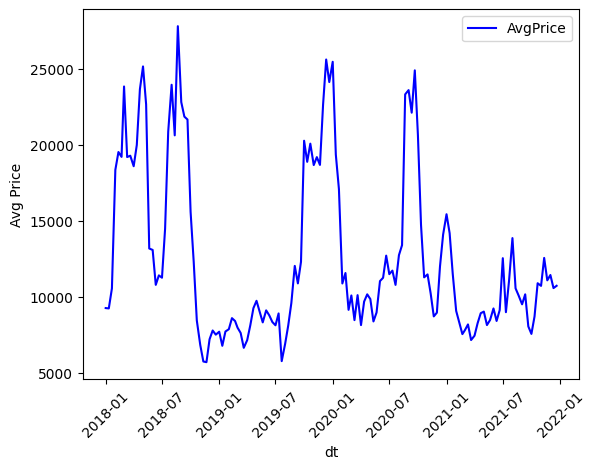

In [14]:
plt.plot(radish['dt'], radish['평균가격(원)'], color = 'blue', label='AvgPrice')

plt.xlabel('dt')
plt.ylabel('Avg Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_20593/2927308282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radish['diff'] = radish['평균가격(원)'].diff()
/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_20593/2927308282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radish['second_diff'] = radish['diff'].diff()


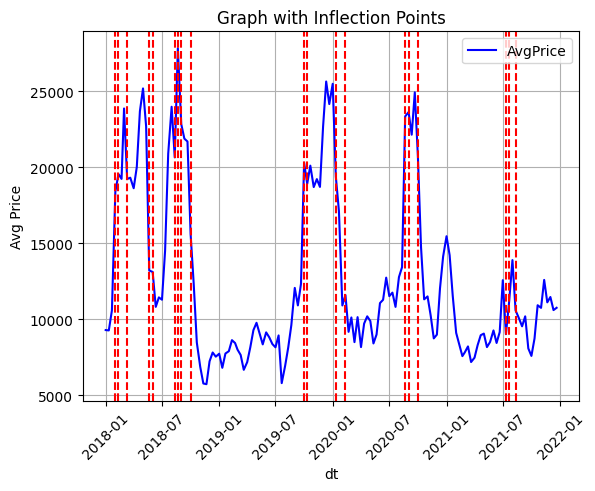

In [15]:
radish['diff'] = radish['평균가격(원)'].diff()

# 기울기의 변화율 계산 (두 번째 차분)
radish['second_diff'] = radish['diff'].diff()

# 임계값 설정 (변곡점으로 간주할 기준)
threshold = radish['second_diff'].std() * 1.5  # 표준편차의 2배를 임계값으로 설정

# 변곡점 탐지
inflection_points = radish[np.abs(radish['second_diff']) > threshold]

# 첫 번째 라인 그래프
plt.plot(radish['dt'], radish['평균가격(원)'], color = 'blue', label='AvgPrice')

# 변곡점에 y축에 평행한 선 추가
for idx, row in inflection_points.iterrows():
    plt.axvline(x=row['dt'], color='red', linestyle='--')

# 그래프 세부 설정
plt.xlabel('dt')
plt.ylabel('Avg Price')
plt.title('Graph with Inflection Points')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [16]:
print("변곡점에 해당하는 x값 (날짜):")
for idx, row in inflection_points.iterrows():
    print(row['dt'])  # 변곡점에 해당하는 x값 (날짜) 출력

변곡점에 해당하는 x값 (날짜):
2018-02-01 00:00:00
2018-02-11 00:00:00
2018-03-11 00:00:00
2018-05-21 00:00:00
2018-06-01 00:00:00
2018-08-11 00:00:00
2018-08-21 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2019-10-01 00:00:00
2019-10-11 00:00:00
2020-01-11 00:00:00
2020-02-11 00:00:00
2020-08-21 00:00:00
2020-09-01 00:00:00
2020-10-01 00:00:00
2021-07-11 00:00:00
2021-07-21 00:00:00
2021-08-11 00:00:00


/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_20593/41565707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radish['Month'] = radish['dt'].dt.month
/var/folders/ng/72pd8d0x4p333xn15g8m8rd40000gn/T/ipykernel_20593/41565707.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


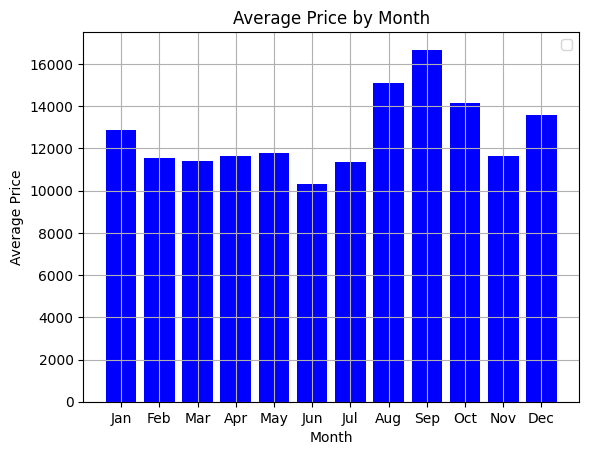

In [18]:
radish['Month'] = radish['dt'].dt.month

# 월별 평균 구하기
monthly_avg = radish.groupby('Month')['평균가격(원)'].mean()


# 그래프 그리기 (나란히 보이게 막대그래프)
plt.bar(monthly_avg.index, monthly_avg.values, color = 'blue')

# x축을 1월, 2월, 3월...로 설정
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 그래프 세부 설정
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

# test

In [19]:
df_test00_og = pd.read_csv('open_ag/test/TEST_00.csv')
df_test00_og.head()

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,T-8순,건고추,화건,30 kg,상품,537302.666667,552000.0
1,T-7순,건고추,화건,30 kg,상품,534742.000000,555743.0
2,T-6순,건고추,화건,30 kg,상품,537408.666667,559794.0
3,T-5순,건고추,화건,30 kg,상품,592768.000000,578819.0
4,T-4순,건고추,화건,30 kg,상품,0.000000,579167.0


In [20]:
df_test00_og[df_test00_og['품목명'] == '무']

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
468,T-8순,무,무,20키로상자,상,0.0,18460.444444
469,T-7순,무,무,20키로상자,상,0.0,21599.222222
470,T-6순,무,무,20키로상자,상,0.0,22569.333333
471,T-5순,무,무,20키로상자,상,0.0,20734.888889
472,T-4순,무,무,20키로상자,상,0.0,22757.555556
...,...,...,...,...,...,...,...
760,T-4순,무,무,18키로상자(비닐포),상,0.0,0.000000
761,T-3순,무,무,18키로상자(비닐포),상,0.0,0.000000
762,T-2순,무,무,18키로상자(비닐포),상,0.0,0.000000
763,T-1순,무,무,18키로상자(비닐포),상,0.0,0.000000


In [23]:
#감자 수미, 거래 단위, 등급
radish_test00 = df_test00_og[(df_test00_og['품목명'] == '무')
                & (df_test00_og['품종명'] == '무')
                & (df_test00_og['거래단위'] =='20키로상자')
                & (df_test00_og['등급'] == '상')]

In [24]:
radish_test00

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
468,T-8순,무,무,20키로상자,상,0.0,18460.444444
469,T-7순,무,무,20키로상자,상,0.0,21599.222222
470,T-6순,무,무,20키로상자,상,0.0,22569.333333
471,T-5순,무,무,20키로상자,상,0.0,20734.888889
472,T-4순,무,무,20키로상자,상,0.0,22757.555556
473,T-3순,무,무,20키로상자,상,0.0,28908.250000
474,T-2순,무,무,20키로상자,상,0.0,25497.714286
475,T-1순,무,무,20키로상자,상,0.0,31412.000000
476,T,무,무,20키로상자,상,0.0,34129.250000


/Users/juran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


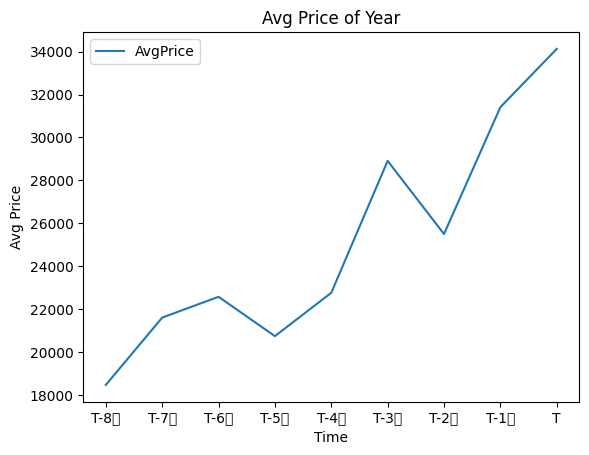

In [25]:
plt.plot(radish_test00['시점'], radish_test00['평균가격(원)'], label='AvgPrice')
plt.xlabel('Time')
plt.ylabel('Avg Price')
plt.legend()
plt.title('Avg Price of Year')
plt.show()

In [46]:

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 데이터 준비
# 예시: potato 데이터에서 'dt'와 '평균가격(원)'을 사용
potato['dt'] = pd.to_datetime(potato['dt'])
potato.set_index('dt', inplace=True)

# 2017, 2018년 데이터를 학습에 사용
train_data = potato.loc['2017':'2018', '평균가격(원)']

# ARIMA 모델 학습
model = ARIMA(train_data, order=(p, d, q))  # p, d, q는 최적화할 하이퍼파라미터
model_fit = model.fit()

# 2019년 예측
forecast = model_fit.forecast(steps=12)  # 12개월(1년) 예측

print(forecast)

ModuleNotFoundError: No module named 'statsmodels'